# Analysis of Poisson data

#### Josep Fortiana             2018-10-24

The first example below is adapted from Gelman et al (2014), _Bayesian Data Analysis - 3rd edition (BDA3)._ The second and third examples from the web course by Charles DiMaggio, the second one also from the book by Jim Albert (2009), _Bayesian computation with R (2nd ed)._ Springer.

## Case study 1: asthma mortality

Suppose that causes of death are reviewed in detail for a city in the United States for a single year. It is found that 3 persons, out of a population of 200,000, died of asthma, giving a crude estimated asthma mortality rate in the city of 1.5 cases per 100,000 persons per year. 

#### Likelihood 
A Poisson sampling model is often used for epidemiological data of this form. The Poisson model derives from an assumption of _exchangeability_ among all small intervals of exposure. Under the Poisson model, the sampling distribution of $y$, the number of deaths in a city of 200,000 in one year, may be expressed as $\mbox{Poisson}(2.00\cdot\theta)$, where $\theta$ represents the true underlying long-term asthma mortality rate
in our city (measured in cases per 100,000 persons per year).

#### Observed evidence

In the above notation, $y = 3$ is a single observation with exposure $x = 2.0$ (since $\theta$ is defined in units of
100,000 people) and unknown rate $\theta$.

#### Prior
We can use knowledge about asthma mortality rates around the world to construct a prior distribution for $\theta$ and then combine the datum $y = 3$ with that prior distribution to obtain a posterior distribution.

What is a sensible prior distribution for $\theta$? Reviews of asthma mortality rates around the world suggest that mortality rates above 1.5 per 100,000 people are rare in Western countries, with typical asthma mortality rates
around 0.6 per 100,000. Trial-and-error exploration of the properties of the gamma distribution, the conjugate prior family for this problem, reveals that a $\mbox{Gamma}(3.0, 5.0)$ density provides a plausible prior density for the asthma mortality rate in this example if we assume exchangeability between this city and other cities and this year and other years. The mean of this prior distribution is 0.6 (with a mode of 0.4), and 97.5% of the mass of the density lies below 1.44. In practice, specifying a prior mean sets the ratio of the two gamma parameters, and then the shape parameter can be altered by trial and error to match the prior knowledge about the tail of the distribution

In [1]:
#~ pgamma is the function which returns the cdf of a gamma distribution: pgamma(1.44, shape=3, rate=5)
# Prior construction from known information
theta.max<-1.5
theta.average<-0.6
# We find alpha and beta for theta~Gamma(alpha,beta) such that 
# Gamma.expectation = alpha/beta = 0.6
# For instance:
alpha<-6
beta<-10
# 1.5 must be a high quantile of this distribution
round(1-pgamma(1.5,shape=alpha,rate=beta),3)
# or
alpha<-3
beta<-5
# 1.5 must be a high quantile of this distribution
round(1-pgamma(1.5,shape=alpha,rate=beta),3)

[1] 0.003

[1] 0.02

#### Posterior 

The posterior distribution of $\theta$ for a $\mbox{Gamma}(\alpha,\beta)$ prior distribution is $\mbox{Gamma}(\alpha+y, \beta+x)$ in this case.

With the prior distribution and data described notation, ($y = 3$, $x = 2.0$), the posterior distribution for $\theta$ is $\mbox{Gamma}(6.0, 7.0)$, which has mean 0.86.

[1] 0.857

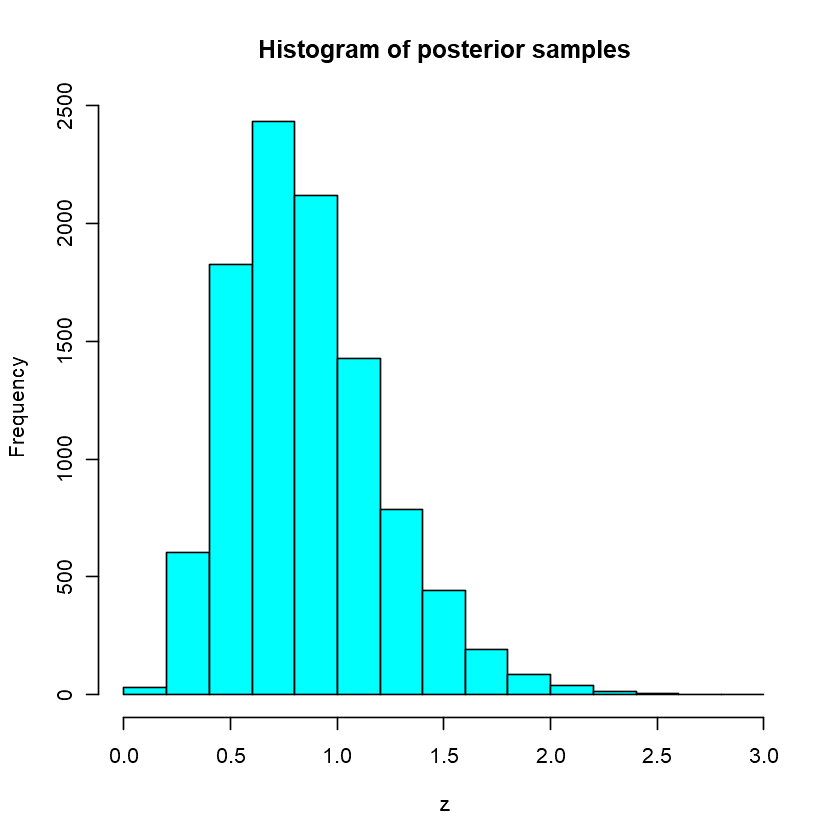

In [2]:
y<-3
x<-2
alpha1<-alpha+y
beta1<-beta+x
m1<-alpha1/beta1
round(m1,3)
# A sample from this posterior
N<-10000
z<-rgamma(N,alpha1,beta1)
hist(z,col="cyan",main="Histogram of posterior samples")

#### Posterior with additional data

Assume we have observed $y_2=30$ deaths over 10 years. Assuming the remaining quantities, (population size and overall rate) are invariant, now $x_2=20$ and the posterior pdf is a $\mbox{Gamma}(\alpha+y_2, \beta+x_2)=\mbox{Gamma}(33,25)$.

[1] 1.32

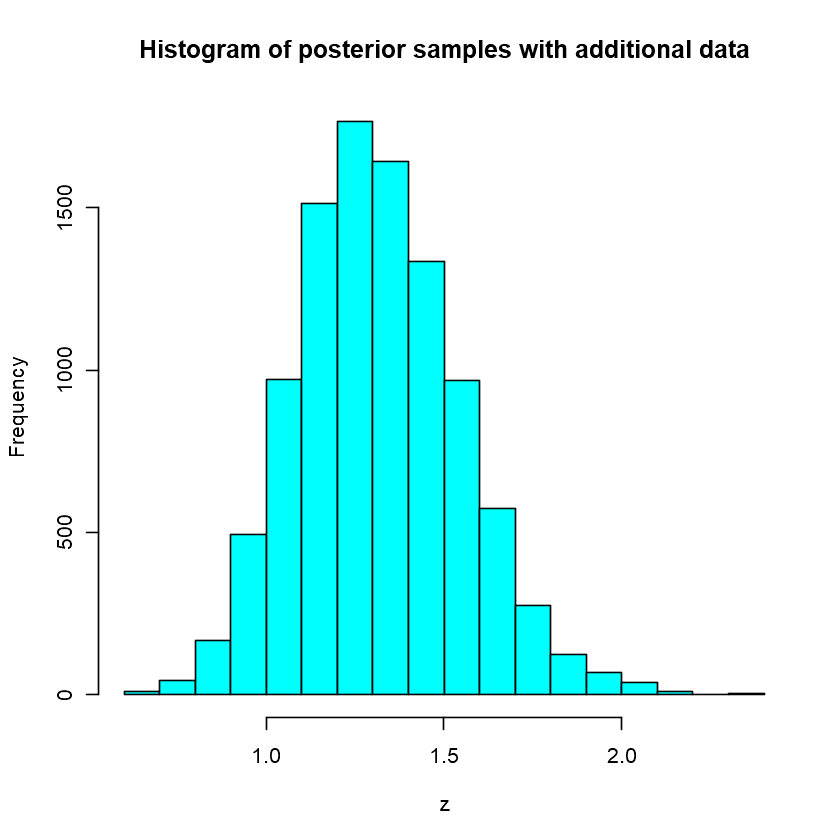

In [3]:
y2<-30
x2<-20
alpha2<-alpha+y2
beta2<-beta+x2
m2<-alpha2/beta2
round(m2,3)
# A sample from this posterior
N<-10000
z<-rgamma(N,alpha2,beta2)
hist(z,col="cyan",main="Histogram of posterior samples with additional data

# there is something wrong on here

### Exercise

Generate:

 1. A sample from the prior predictive distribution, and
 2. A sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 

In both cases plot the simulated pmf and compare it with the theoretical one.

Estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant)

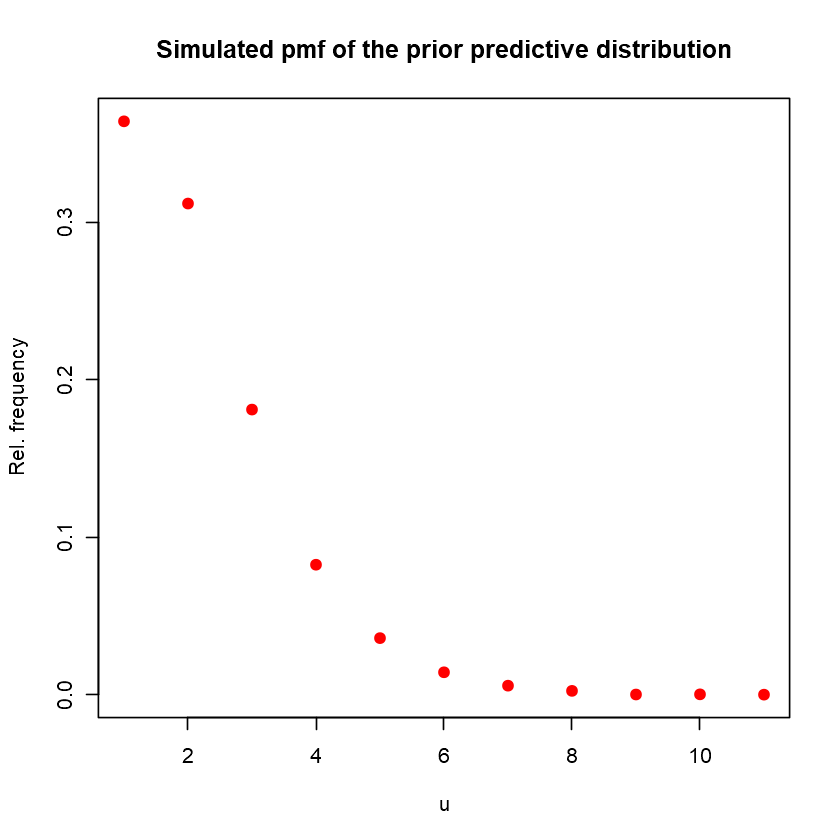

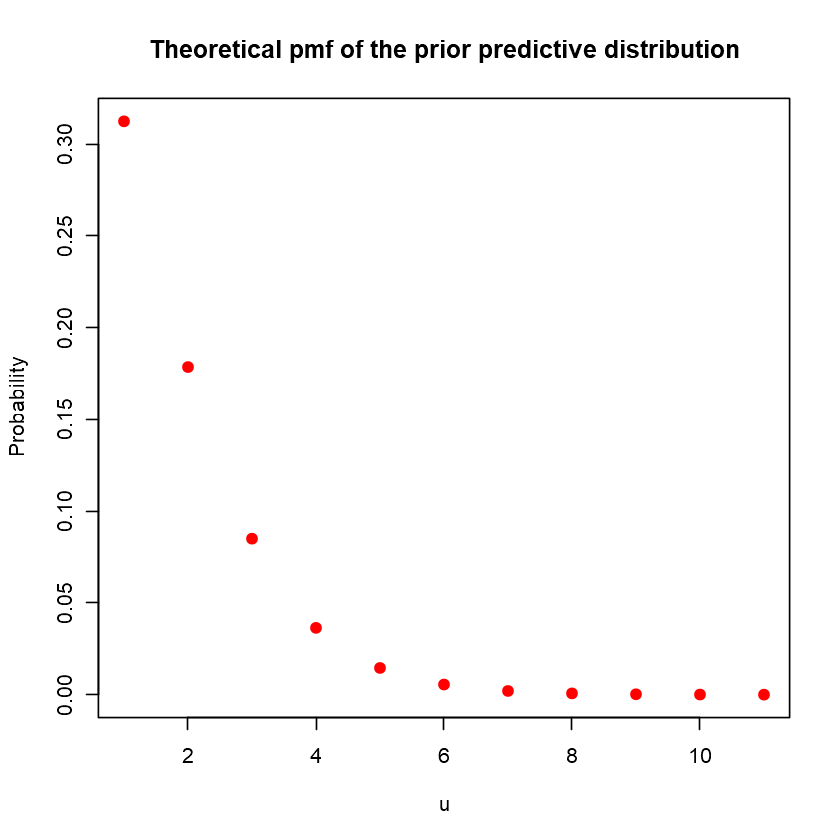

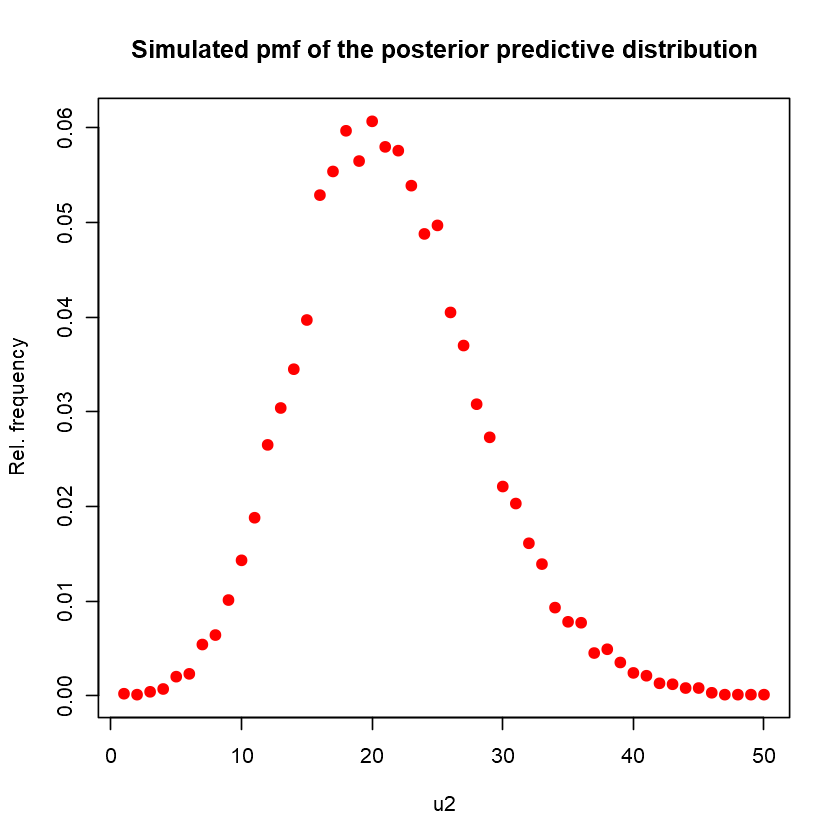

[1] "Probability of more than 25 fatalities in the next 10 years =  0.527"

[1] "Estimated probability of more than 25 fatalities in the next 10 years =  0.523"

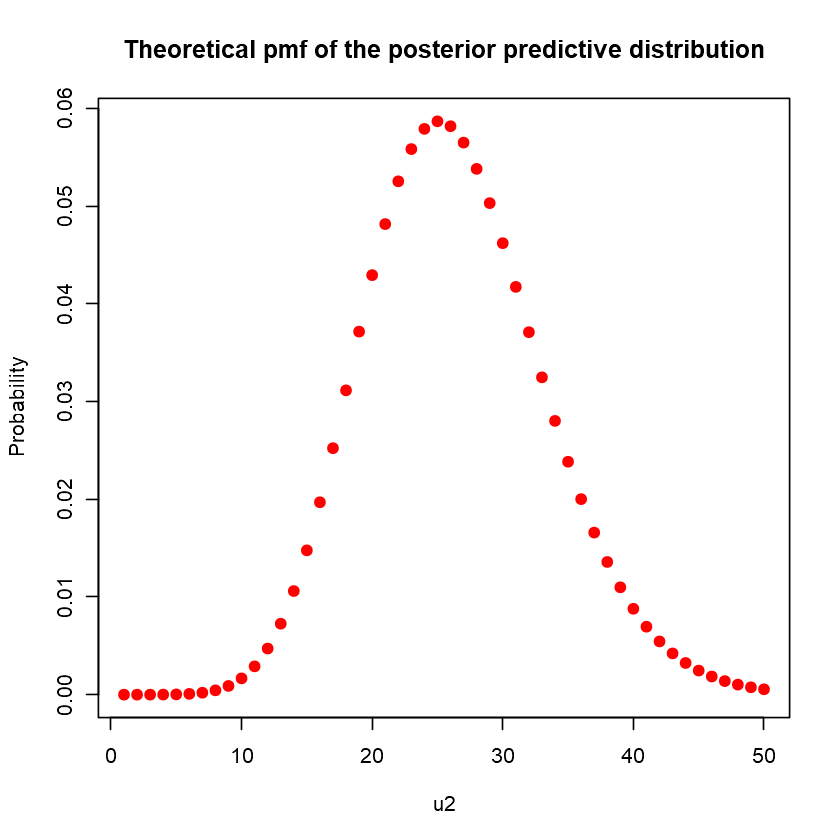

In [4]:
#
# Insert here your code
#
N<-10000
theta<-rgamma(N,alpha,beta)
z<-rpois(N,2*theta)
Tz<-table(z)/N
A<-as.data.frame(Tz)
u<-as.numeric(A$z)
plot(u,A$Freq,type="p",pch=19,col="red",
     ylab="Rel. frequency",main="Simulated pmf of the prior predictive distribution")
plot(u,dnbinom(u,size=alpha,prob=beta/(beta+2)),type="p",pch=19,col="red",
     ylab="Probability",main="Theoretical pmf of the prior predictive distribution")
theta2<-rgamma(N,alpha2,beta2)
z2<-rpois(N,20*theta2)
Tz2<-table(z2)/N
A2<-as.data.frame(Tz2)
u2<-as.numeric(A2$z)
plot(u2,A2$Freq,type="p",pch=19,col="red",
     ylab="Rel. frequency",main="Simulated pmf of the posterior predictive distribution")
plot(u2,dnbinom(u2,size=alpha2,prob=beta2/(beta2+20)),type="p",pch=19,col="red",
     ylab="Probability",main="Theoretical pmf of the posterior predictive distribution")
sprintf("Probability of more than 25 fatalities in the next 10 years = %6.3f",1-pnbinom(25,size=alpha2,prob=beta2/(beta2+20)))
sprintf("Estimated probability of more than 25 fatalities in the next 10 years = %6.3f",sum(z2>25)/N)

## Case study 2: Heart transplant mortality

Consider the problem of learning about the rate of success of heart transplant surgery _of a particular hospital._

   - $y=$ observed number of deaths within 30 days of surgery,
	
   - $e=$ the _exposure,_ expected number of deaths within 30 days of surgery.

$e$ is derived from an individual-level risk estimate for the probability of death for each patient based on demographic characteristics and medical history. For our purposes $e$ works as an "equivalent number of surgeries".
The _Standardized Mortality Ratio (SMR)_ is $\dfrac{y}{e}$, the ratio of observed to expected deaths. 

#### Likelihood

We assume that the number of deaths follows a Poisson distribution mith mean $e\,\lambda$, $y\sim\mbox{Poisson}(e\,\lambda)$. When $e$ is an integer this means $y$ is the sum of $e$ independent $\mbox{Poisson}(\lambda)$ r.v.
The _theoretical SMR,_ \(\lambda\), is the quantity of interest, mortality rate per unit exposure. 
A difficulty in the classical treatment of this problem is that the usual ML estimate $\widehat{\lambda}=\dfrac{y}{n}$ is unstable, heavily dependent on a hospital with a small number of surgeries, where $y$ will be close to 0.

#### Example data

- Hospital A had $y_{A}=1$ death with an exposure of $e_{A}=66$ surgeries.
	
- Hospital B had $y_{B}=4$ deaths with an exposure of in $e_{B}=1767$ surgeries.
	
- A comparison group of 10 nearby hospitals had $y_{T}=16$ deaths with a total exposure of $e_{T}=15174$ surgeries.

In [5]:
yA<-1
eA<-66
yB<-4
eB<-1767
yT<-16
eT<-15174

#### Classical ML estimates

$$
    \begin{aligned}
    \hat{\lambda}_{A}&=\dfrac{y_{A}}{e_{A}}=0.01515152,\\
	\hat{\lambda}_{B}&=\dfrac{y_{B}}{e_{B}}=0.002263724,\\
	\hat{\lambda}_{T}&=\dfrac{y_{T}}{e_{T}}=0.001054435.
    \end{aligned}
$$

The $\hat{\lambda}_{A}$ value is initially suspect, due to the small number of observations.

In [2]:
lambda.hat.A<-yA/eA
lambda.hat.B<-yB/eB
lambda.hat.T<-yT/eT
lambda.hat.A
#[1] 0.01515152
lambda.hat.B
#[1] 0.002263724
lambda.hat.T
#[1] 0.001054435

[1] 0.01515152

[1] 0.002263724

[1] 0.001054435

#### Prior

With the conjugate prior $\lambda\sim\mbox{Gamma}(\alpha,\beta)$, 

$$
	\mbox{E}(\lambda)=\dfrac{\alpha}{\beta},\quad \mbox{E}(\lambda)=\dfrac{\alpha}{\beta^{2}},
$$

we can encode the information from the comparison group of 10 hospitals by setting:

$$
	\lambda\sim\mbox{Gamma}(\alpha,\beta),\quad \alpha=16, \quad \beta=15174.
$$

In [6]:
prior.alpha<-yT
prior.beta<-eT

#### Prior predictive

We check the validity of the proposed model by inspecting the prior predictive distribution and checking whether the observed $y_A$ is consistent with the probabilities according to this distribution:

In [7]:
# parameters of the prior predictive negative binomial for yA (with the exposure eA)
r<-prior.alpha
pA<-prior.beta/(prior.beta+eA)
# compute the probabilities of a range of yA values
yA.range<-0:10  # A range of values around the observed yA
yA.prior.pred<-dnbinom(yA.range, size=r, prob=pA)
yA.prior.pred.table<-rbind(yA.range,yA.prior.pred)
round(yA.prior.pred.table,3)

yA.range,0.000,1.000,2.000,3,4,5,6,7,8,9,10
yA.prior.pred,0.933,0.065,0.002,0,0,0,0,0,0,0,0


Practically all of the probability of the predictive distribution is concentrated on the two values $y_A=0$ and $y_A=1$. The observed number of deaths $y_A=1$ is in the middle of this predictive distribution, so there is no reason to doubt our model.

In [8]:
# parameters of the prior predictive negative binomial for yB (with the exposure eB)
r<-prior.alpha
pB<-prior.beta/(prior.beta+eB)
# compute the probabilities of a range of yB values
yB.range<-0:12  # A range of values around the observed yB=4
yB.prior.pred<-dnbinom(yB.range, size=r, prob=pB)
yB.prior.pred.table<-rbind(yB.range,yB.prior.pred)
round(yB.prior.pred.table,3)

yB.range,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9,10,11,12
yB.prior.pred,0.172,0.286,0.254,0.159,0.079,0.033,0.012,0.004,0.001,0,0,0,0


Indeed, the observed $y_B=4$ is not the _most_ probable one according to the prior predictive, this is not the point however: we check that its probability is not too small to preclude its occurrence.

#### Posterior

We simulate the and posterior pdf's of $\lambda$ for both hospitals A and B. We compare these curves to the (common) prior pdf:

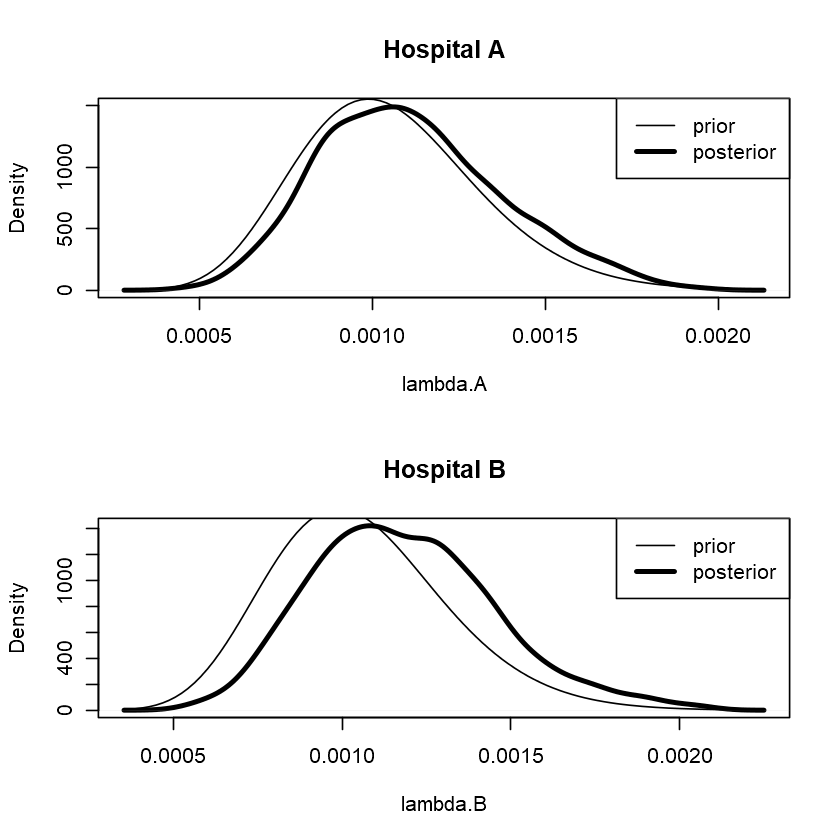

In [9]:
N<-1000
lambda.A<-rgamma(N, shape = prior.alpha + yA, rate = prior.beta + eA)
lambda.B<-rgamma(N, shape = prior.alpha + yB, rate = prior.beta + eB)
old.par<-par(mfrow = c(2, 1))
    plot(density(lambda.A), main="Hospital A", xlab="lambda.A",ylim=c(0,1500),lwd=3)
    curve(dgamma(x,shape = prior.alpha,rate=prior.beta), add=TRUE)
    legend("topright",legend=c("prior","posterior"),lwd=c(1,3))
    plot(density(lambda.B), main="Hospital B", xlab="lambda.B", lwd=3)
    curve(dgamma(x, shape = prior.alpha, rate = prior.beta), add=TRUE)
    legend("topright",legend=c("prior","posterior"),lwd=c(1,3))
par(old.par)

## Case study 3: London bombings during WWII

The following data describe the number of bomb hits in a $36\,\mbox{km}^2$ area of South London during World War II, partitioned into $0.25\,\mbox{km}^2$ grid squares:

$$
    \begin{array}{lrrrrrr}
    \text{Hits}\; (y) &  0 &  1 & 2 & 3  &4  &7\\
    \text{Areas}\;(n) &229 &211 &93 &35  &7  &1
    \end{array}
$$

In [10]:
y<-c(0,1,2,3,4,7)
n<-c(229,211,93,35,7,1)
H<-sum(y*n) # Total number of hits
N<-sum(n)   # Total number of grid squares
H
N 
# NB. The total number of grid squares is equal to the total area in km2 multiplied by 16 = number of
#     grid squares per km2.
y.bar<-H/N   # Average number of hits per grid square
round(y.bar,3)

[1] 537

[1] 576

[1] 0.932

#### Likelihood

We propose that $Y$, the number of hits per grid square follows a conjugate prior $\mbox{Poisson}(\lambda)$. In the frequentist approach the ML estimate is $\widehat{\lambda}=\overline{y}=0.932$

#### Prior, Posterior, Prior predictive

With prior pdf $\lambda\sim\mbox{Gamma}(\alpha,\beta)$ prior, the posterior will be $(\lambda|y)\sim\mbox{Gamma}(\alpha+H,\beta+N)$, the prior predictive distribution is a $\mbox{NegBin}(r,p)$, where $r=\alpha$ and $p=\dfrac{\beta}{\beta+N}$.

The posterior mode, that is, the Maximum a Posteriori (MAP) estimator of lambda is equal to:

$$
    MAP =\dfrac{\alpha+H-1}{\beta+N},
$$

and the posterior expectation is:

$$
    E(\lambda|y) =\dfrac{\alpha+H}{\beta+N},
$$

One possible Non Informative Prior (NIP) distribution for $\lambda$ is Jeffreys' prior, which for the Poisson distribution can be shown to be the _improper distribution_ with the following pdf (sort of):

$$
    h(\lambda)\propto\dfrac{1}{\sqrt{\lambda}}, \qquad \lambda in (0,\infty).
$$


Such a distribution is said to be improper because $h(\lambda)$ is not integrable on $(0,\infty)$.

The use of such priors in Bayesian statistics is somewhat controversial. Some statisticians have argued that such distributions cannot legitimately represent a prior belief and thus cannot be a rational part of Bayesian statistics.
However, most Bayesian statisticians consider them reasonable in the sense of representing a limit of proper priors. IN particular, $h(\lambda)$ can be considered a limiting member of the Gamma family:

$$
    h= \mbox{Gamma}(1/2,0) = \lim_{\beta\to0}\mbox{Gamma}(1/2,\beta)
$$

with the posterior representing a similarly limiting case. Nevertheless, it is important to be careful when dealing with improper priors; the limiting distribution idea produces reasonable conclusions only if the posterior is guaranteed to be proper.

For instance, in this case the posterior distribution is a $(\lambda\,|\,y)\sim\mbox{Gamma}(0.5+H,N)$, a perfectly decent Gamma distribution. The limiting negative binomial prior predictive distribution shows a seemingly paradoxical behavior, both in its theoretical description ($p=0$) and in trying to simulate it, since there is no agreed upon method to sample from an improper distribution. As far as I know, there is no way around this but, in afterthought, what is the point in a **prior** predictive distribution when precisely we have built a **Non Informative Prior**, conceding we have no usable prior knowledge about the system?

In [11]:
# For the Jeffreys' non informative prior (NIP):
alpha<-0.5
beta<-0
alpha.post<-alpha+H
beta.post<-beta+N
MAP<-(alpha.post-1)/(beta.post)
E.post.lambda.y<-(alpha.post-1)/(beta.post)
round(MAP,3)
round(E.post.lambda.y,3)

[1] 0.931

[1] 0.931

#### Derivation of Jeffreys' NIP for a Poisson likelihood

For those who are interested in it, here is the (very easy) derivation of Jeffreys' non informative prior for the Poisson likelihood:

$$
    f(y\,|\,\lambda) = \exp(-\lambda)\cdot \dfrac{\lambda^{y}}{y!}.
$$

Jeffrey's NIP for a (Cramér-Rao regular) one-parameter likelihood is defined as proportional to _the square root of the Fisher information._ In this case, since:

$$
    I(\lambda)=-\mbox{E}\left(\dfrac{\partial^2 \log f}{\partial\,\lambda^2}\right)
          =-\mbox{E}\left(-\dfrac{y}{\lambda^2}\right)=\dfrac{1}{\lambda},
$$

We have:

$$
    h(\lambda) \propto \lambda^{-1/2},
$$

an improper pdf, which can be thought of as a limiting $\mbox{Gamma}(1/2,0)$.

#### Posterior predictive distribution 

We might be interested in applying the knowledge gained in this experiment to a further prediction of the number $H'$ of hits on a set of $N'$ grid squares.

Now the posterior predictive distribution is a proper negative binomial, with parameters:

$$
    r=\alpha_{post}=0.5+H, \qquad p = \dfrac{\beta_{post}}{\beta_{post}+N'}= \dfrac{N}{N+N'}.
$$

#### Exercise

Write a simulation of the posterior predictive distribution, either by sampling from the theoretical negative binomial or (preferably) by sampling from the posterior Gamma and so forth. You can take $N'=N$ if we are interested in predicting for the same area at a later time interval.

In [13]:
#
# Insert your code here
#